# Implement 2D Fast Fourier Transform

- Implemented using FFT in 1D
- Using the implemented 1D fft appy it on all rows
- Implement FFT on the output from all the rows for the desired output

### FFT in one 1D
```
function [out_sig] = NEWFFT(in_sig,k,N)
    len = size(in_sig,2)
    out_sig = zeros(1,len);
    if len == 1
        out_sig = in_sig;
          
    else 
        Ok = in_sig(1:2:len);
        Ek = in_sig(2:2:len);
    
        FOk = NEWFFT(Ok,k,N/2);
        FEk = NEWFFT(Ek,k,N/2);
        size(FOk)
        size(FEk)
        f1 = FEk + exp(-1i*2*pi*k/N).*FOk;
        f2 = FEk - exp(-1i*2*pi*k/N).*FOk;
        
        out_sig = cat(2,f1,f2);
    end
end

```

### Using FFT  in 1D example

In [7]:
% Sampling Frequency 
fs = 64;
% Frequency
N = 64;
n = 0:N*fs -1/fs;

t = 2*pi*[0:1/fs:N-1/fs];
y = sin(t) + cos(5*t);

% Hence the formula of Fourier transform is
ft_mat = exp(-1i*2*pi*n'*n/(N*fs));
y_ft = y*ft_mat;

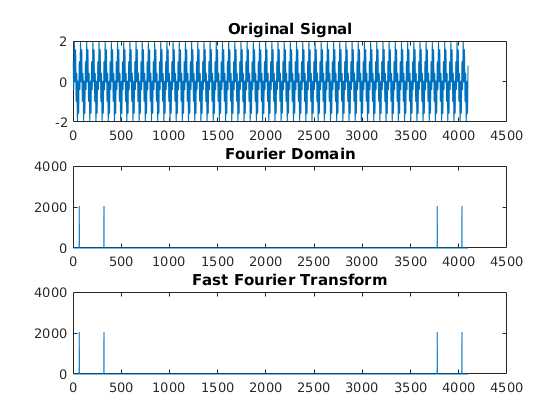

In [11]:
figure;
subplot(3,1,1);
plot(y);
title('Original Signal');

subplot(3,1,2);
plot(abs(y_ft));
title('Fourier Domain');

% Using FFT 
y_fft = NEWFFT(y,n,N*fs);
subplot(3,1,3);
plot(abs(y_fft));
title('Fast Fourier Transform');

# Implementing FFT for 2D

### Function
```
function [out_image] = NEW_FFT2(in_image)
    N = size(in_image,1);
    M = size(in_image,2);
    out_image = zeros(N,M);
    for n=N
        size(out_image(n,:))
        out_image(n,:) = NEWFFT(in_image(n,:),[1:M],N);
    end
    
    out_image = abs(out_image);
	out_image = log(out_image + 1);
	out_image = mat2gray(out_image);
	imshow(out_image)



end
```

### Test our function on multiple images

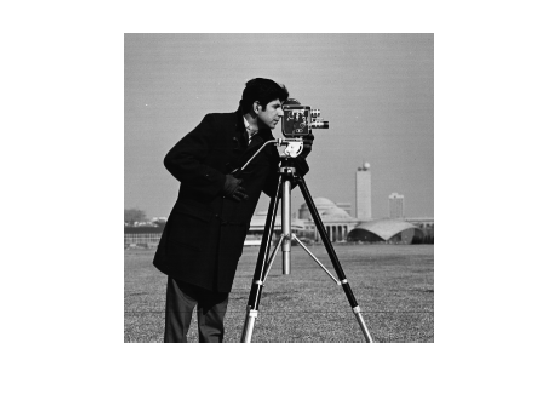

In [1]:
img = imread('./cameraman.png');
imshow(img);
img = double(img);

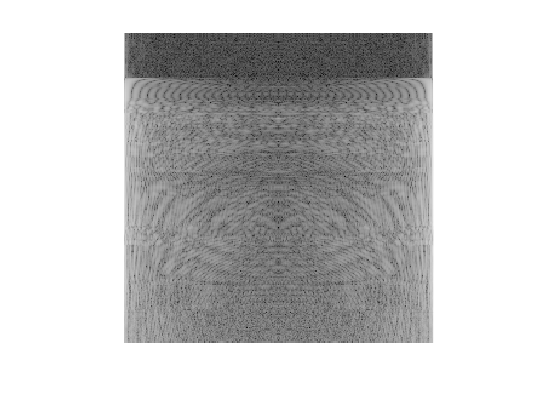

In [2]:
% Transform the image
new_img = NEW_FFT2(img);

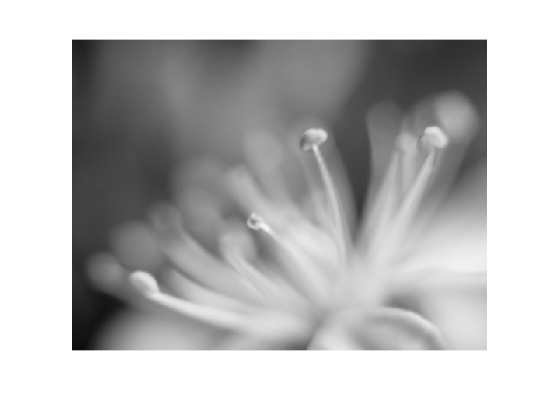

In [2]:
img = imread('./blur.jpg');
img = rgb2gray(img);
img = imresize(img,1/3);
imshow(img);
img = double(img);

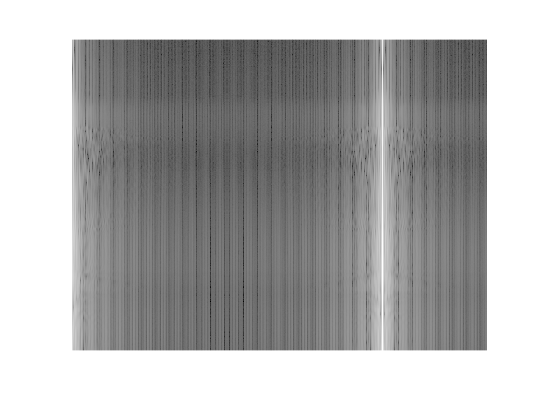

In [3]:
new_img = NEW_FFT2(img);

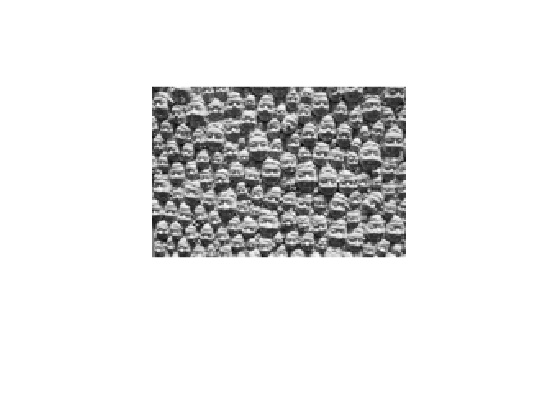

In [3]:
img = imread('./Faces.jpg');
img = rgb2gray(img);
img = imresize(img,1/4);
imshow(img);
img = double(img);

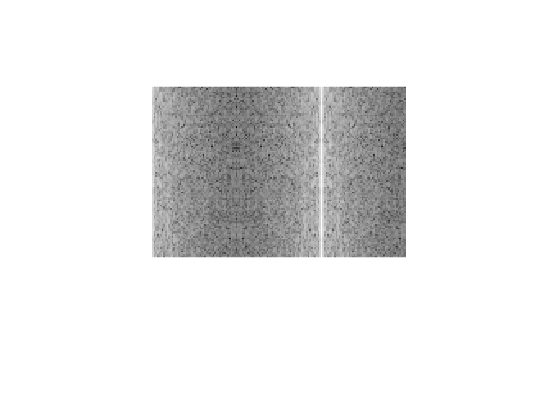

In [5]:
new_img = NEW_FFT2(img);